In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
import os

In [2]:
# Change data set for 3 runs 
imagePaths = list(paths.list_images("data/training"))
data = []
labels = []

# loop over the image paths
for imagePath in imagePaths:
    # extract the class label from the filename
    label = imagePath.split(os.path.sep)[-2]
    # load the input image (224x224) and preprocess it
    image = load_img(imagePath, target_size=(224, 224))
    image = img_to_array(image)
    image = preprocess_input(image)
    # update the data and labels lists, respectively
    data.append(image)
    labels.append(label)
    
# convert the data and labels to NumPy arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)

[INFO] loading images...


In [3]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels,
    test_size=0.20, stratify=labels, random_state=42)



In [2]:
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

In [3]:
# Uncomment for first run only.

# baseModel = MobileNetV2(weights="imagenet", include_top=False,
#     input_tensor=Input(shape=(224, 224, 3)))

# headModel = baseModel.output
# headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
# headModel = Flatten(name="flatten")(headModel)
# headModel = Dense(128, activation="relu")(headModel)
# headModel = Dropout(0.5)(headModel)
# headModel = Dense(4, activation="softmax")(headModel)

# model = Model(inputs=baseModel.input, outputs=headModel)

# for layer in baseModel.layers:
#     layer.trainable = False

In [4]:
from tensorflow.keras.utils import plot_model
import pydot

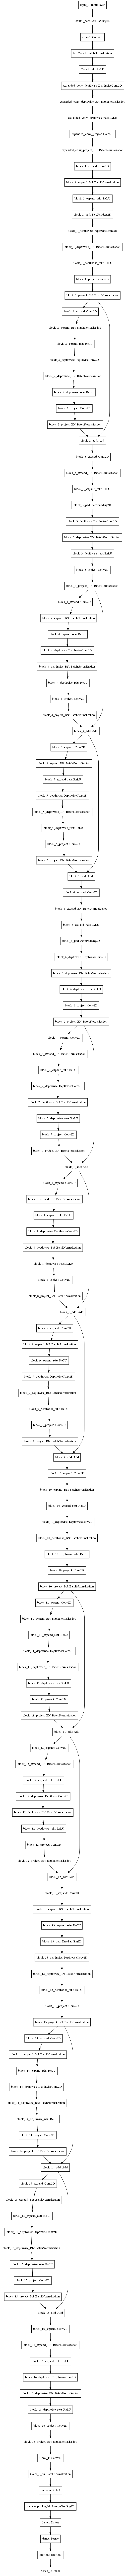

In [8]:
plot_model(model)

In [12]:
INIT_LR = 1e-4
EPOCHS = 20
BS = 10

In [13]:
# Un comment for first run only
# print("[INFO] compiling model...")
# opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# model.compile(loss="categorical_crossentropy", optimizer=opt,
#     metrics=["acc"])


In [14]:
# Only required for last training run 
checkpoint = ModelCheckpoint('model-{epoch:03d}.hd5f',monitor='val_loss',verbose=1,save_best_only=True,mode='auto')
earlyStopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [9]:
model = load_model("Face_Detection_Model.h5")

OSError: SavedModel file does not exist at: MObileNet_Top_FAlse_preprocessed_model_2_new_2.h5/{saved_model.pbtxt|saved_model.pb}

In [21]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________________

block_5_expand_BN (BatchNormali (None, 28, 28, 192)  768         block_5_expand[0][0]             
__________________________________________________________________________________________________
block_5_expand_relu (ReLU)      (None, 28, 28, 192)  0           block_5_expand_BN[0][0]          
__________________________________________________________________________________________________
block_5_depthwise (DepthwiseCon (None, 28, 28, 192)  1728        block_5_expand_relu[0][0]        
__________________________________________________________________________________________________
block_5_depthwise_BN (BatchNorm (None, 28, 28, 192)  768         block_5_depthwise[0][0]          
__________________________________________________________________________________________________
block_5_depthwise_relu (ReLU)   (None, 28, 28, 192)  0           block_5_depthwise_BN[0][0]       
__________________________________________________________________________________________________
block_5_pr

block_11_expand_BN (BatchNormal (None, 14, 14, 576)  2304        block_11_expand[0][0]            
__________________________________________________________________________________________________
block_11_expand_relu (ReLU)     (None, 14, 14, 576)  0           block_11_expand_BN[0][0]         
__________________________________________________________________________________________________
block_11_depthwise (DepthwiseCo (None, 14, 14, 576)  5184        block_11_expand_relu[0][0]       
__________________________________________________________________________________________________
block_11_depthwise_BN (BatchNor (None, 14, 14, 576)  2304        block_11_depthwise[0][0]         
__________________________________________________________________________________________________
block_11_depthwise_relu (ReLU)  (None, 14, 14, 576)  0           block_11_depthwise_BN[0][0]      
__________________________________________________________________________________________________
block_11_p

In [16]:
print("[INFO] training Model...")
history = model.fit(
    aug.flow(trainX, trainY, batch_size=BS),
    validation_data=(testX, testY),
    epochs=EPOCHS,
    callbacks=[checkpoint,earlyStopping])

[INFO] training Model...
Epoch 1/20
735/735 [==============================] - ETA: 0s - loss: 0.1645 - acc: 0.9419
Epoch 00001: val_loss improved from inf to 0.11914, saving model to model-001.hd5f
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model-001.hd5f\assets
735/735 [==============================] - 1026s 1s/step - loss: 0.1645 - acc: 0.9419 - val_loss: 0.1191 - val_acc: 0.9565
Epoch 2/20
735/735 [==============================] - ETA: 0s - loss: 0.1428 - acc: 0.9488
Epoch 00002: val_loss did not improve from 0.11914
735/735 [==============================] - 1190s 2s/step - loss: 0.1428 - acc: 0.9488 - val_loss: 0.1224 - val_acc: 0.9532
Epoch 3/20
735/735 [==============================] - ETA: 2s - loss: 0.1526 - acc: 0.945 - ETA: 0s - loss: 0.1528 - acc: 0.9454
Epoch 00003: val_loss improved from 0.11914 to 0.11407, saving model to model-003.hd5f
INFO:tensorflow:Assets written to: model-003.hd5f\assets
73

In [10]:
# Save model after every run to not loose the weights
model.save("Face_Detection_Model.h5")

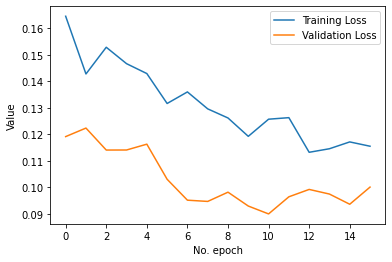

In [19]:
# Plot the accuracy and los improvement in graph to show how well model is getting trained on.
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.ylabel('Value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

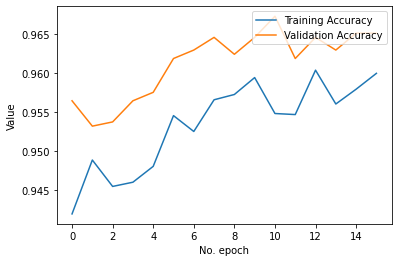

In [20]:
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.ylabel('Value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()